In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_train=pd.read_csv("train.csv")
data_train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [2]:
data_train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


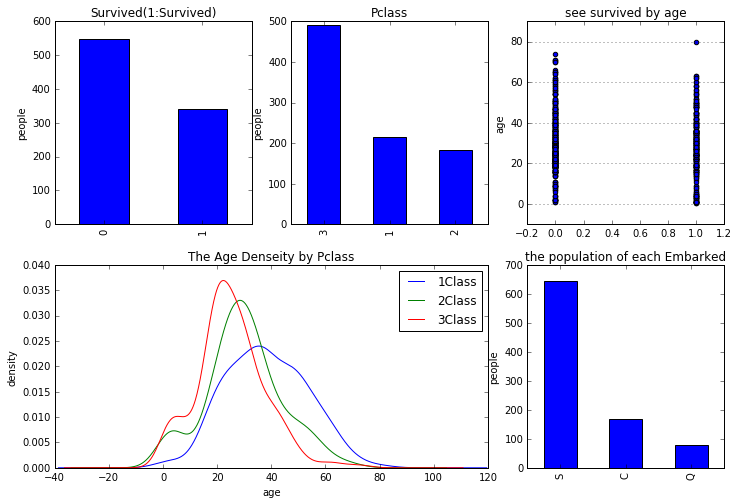

In [5]:
fig=plt.figure(figsize=(12,8))
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))
data_train.Survived.value_counts().plot(kind="bar")
plt.title("Survived(1:Survived)")
plt.ylabel("people")

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.title("Pclass")
plt.ylabel("people")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived,data_train.Age)
plt.ylabel("age")
plt.grid(b=True,which='major',axis='y')
plt.title("see survived by age")


plt.subplot2grid((2,3),(1,0),colspan=2)
data_train.Age[data_train.Pclass==1].plot(kind='kde')
data_train.Age[data_train.Pclass==2].plot(kind='kde')
data_train.Age[data_train.Pclass==3].plot(kind='kde')
plt.xlabel('age')
plt.ylabel('density')
plt.title('The Age Denseity by Pclass')
plt.legend(("1Class","2Class","3Class"),loc='best')

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind="bar")
plt.ylabel("people")
plt.title("the population of each Embarked")

plt.show()

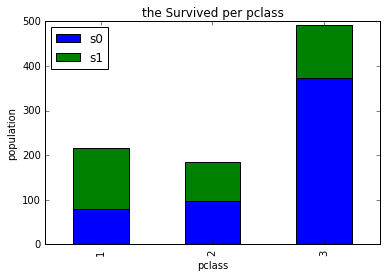

In [6]:
#查看乘客等级的获救情况
fig=plt.figure()
s0=data_train.Pclass[data_train.Survived==0].value_counts()
s1=data_train.Pclass[data_train.Survived==1].value_counts()
df=pd.DataFrame({'s0':s0,'s1':s1})
df.plot(kind='bar',stacked=True)
plt.title("the Survived per pclass")
plt.xlabel("pclass")
plt.ylabel("population")
plt.show()


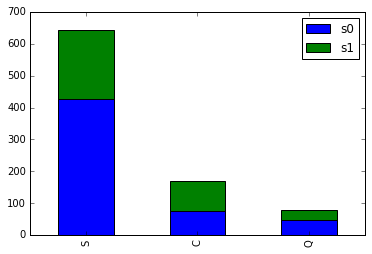

In [7]:
#各个登录港口的获救情况
fig=plt.figure()
s0=data_train.Embarked[data_train.Survived==0].value_counts()
s1=data_train.Embarked[data_train.Survived==1].value_counts()
df=pd.DataFrame({'s0':s0,'s1':s1})
df.plot(kind='bar',stacked=True)
plt.show()

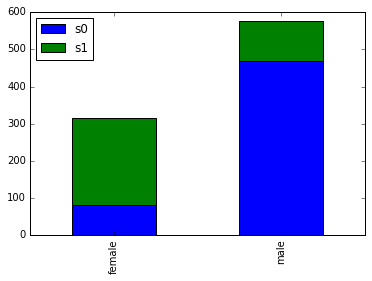

In [8]:
fig=plt.figure()
s0=data_train.Sex[data_train.Survived==0].value_counts()
s1=data_train.Sex[data_train.Survived==1].value_counts()
df=pd.DataFrame({'s0':s0,'s1':s1})
df.plot(kind='bar',stacked=True)
plt.show()

<font color=red>性别，客仓等级是重要特征<font>

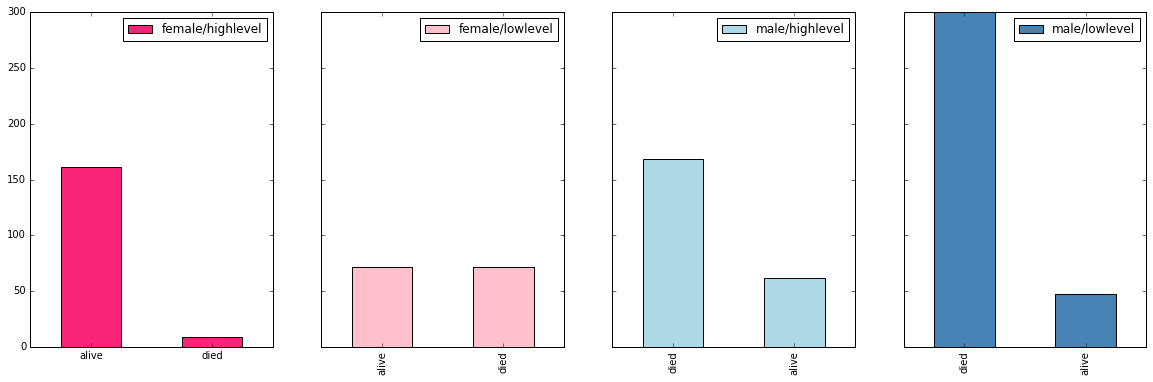

In [9]:
fig=plt.figure(figsize=(20,6))
fig.set(alpha=0.65)
plt.title("the Survived by pclass and sex")

ax1=fig.add_subplot(141)
data_train.Survived[(data_train.Sex=='female') &(data_train.Pclass!=3)].value_counts().plot(kind='bar',color='#FA2479')
ax1.set_xticklabels(['alive','died'],rotation=0)
ax1.legend(['female/highlevel'],loc='best')

ax2=fig.add_subplot(142,sharey=ax1)
data_train.Survived[(data_train.Sex=='female')&(data_train.Pclass==3)].value_counts().plot(kind='bar',color='pink')
ax2.set_xticklabels(['alive','died'])
plt.legend(['female/lowlevel'],loc='upper right')

plt.subplot(143,sharey=ax1)
data_train.Survived[(data_train.Sex=='male')&(data_train.Pclass!=3)].value_counts().plot(kind='bar',color='lightblue')
plt.xticks([1,0],['alive','died'])
plt.legend(['male/highlevel'],loc='best')

ax4=fig.add_subplot(144,sharey=ax1)
data_train.Survived[(data_train.Sex=='male')&(data_train.Pclass==3)].value_counts().plot(kind='bar',color='steelblue')
plt.xticks([1,0],['alive','died'])
ax4.legend(['male/lowlevel'],loc='best')
plt.show()

In [10]:
g=data_train.groupby(['SibSp','Survived'])
df=pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [11]:
data_train.Cabin.value_counts()

C23 C25 C27        4
G6                 4
B96 B98            4
D                  3
C22 C26            3
E101               3
F2                 3
F33                3
B57 B59 B63 B66    2
C68                2
B58 B60            2
E121               2
D20                2
E8                 2
E44                2
B77                2
C65                2
D26                2
E24                2
E25                2
B20                2
C93                2
D33                2
E67                2
D35                2
D36                2
C52                2
F4                 2
C125               2
C124               2
                  ..
F G63              1
A6                 1
D45                1
D6                 1
D56                1
C101               1
C54                1
D28                1
D37                1
B102               1
D30                1
E17                1
E58                1
F E69              1
D10 D12            1
E50                1
A14          

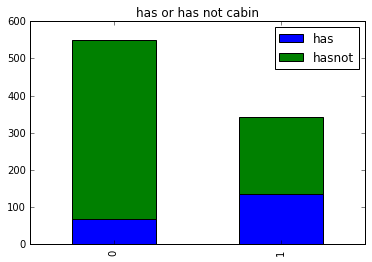

In [12]:
fig=plt.figure(figsize=(12,6))
fig.set(alpha=0.2)

Survived_cabin=data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin=data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({'has':Survived_cabin,'hasnot':Survived_nocabin})
df.plot(kind='bar',stacked=True)
plt.title('has or has not cabin')
plt.show()


In [13]:
from sklearn.ensemble import RandomForestRegressor
def set_missing_age(df):
    age_df=df[['Age','Fare','Parch','SibSp','Pclass']]
    known_age=age_df[pd.notnull(age_df['Age'])].as_matrix()
    unknown_age=age_df[pd.isnull(age_df['Age'])].as_matrix()
    y=known_age[:,0]
    x=known_age[:,1:]
    rfr=RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    rfr.fit(x,y)
    predAge=rfr.predict(unknown_age[:,1:])
    df.loc[(pd.isnull(df['Age'])),'Age']=predAge
    return df,rfr
def set_cabin_type(df):
    df.loc[(df.Cabin.notnull()),'Cabin']='yes'
    df.loc[(df.Cabin.isnull()),'Cabin']='no'
    return df
data_train,rfr=set_missing_age(data_train)
data_train=set_cabin_type(data_train)
data_train[:2]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,no,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,yes,C


In [14]:
dummies_Pclass=pd.get_dummies(data_train['Pclass'],prefix='Pclass')
dummies_Sex=pd.get_dummies(data_train['Sex'],prefix='Sex')
dummies_Cabin=pd.get_dummies(data_train['Cabin'],prefix='Cabin')
dummies_Embarked=pd.get_dummies(data_train['Embarked'],prefix='Embarked')
df=pd.concat([data_train,dummies_Pclass,dummies_Sex,dummies_Cabin,dummies_Embarked],axis=1)
df.drop(['Pclass','Sex','Cabin','Embarked','Name','Ticket'],axis=1,inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_no,Cabin_yes,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.000000,1,0,7.2500,0,0,1,0,1,1,0,0,0,1
1,2,1,38.000000,1,0,71.2833,1,0,0,1,0,0,1,1,0,0
2,3,1,26.000000,0,0,7.9250,0,0,1,1,0,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,1,0,0,1,0,0,1,0,0,1
4,5,0,35.000000,0,0,8.0500,0,0,1,0,1,1,0,0,0,1
5,6,0,23.838953,0,0,8.4583,0,0,1,0,1,1,0,0,1,0
6,7,0,54.000000,0,0,51.8625,1,0,0,0,1,0,1,0,0,1
7,8,0,2.000000,3,1,21.0750,0,0,1,0,1,1,0,0,0,1
8,9,1,27.000000,0,2,11.1333,0,0,1,1,0,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,0,1,0,1,0,1,0,1,0,0


In [15]:
import sklearn.preprocessing as preprocessing
scaler=preprocessing.StandardScaler()
age_scale_param=scaler.fit(df['Age'].reshape((-1,1)))
fare_scale_param=scaler.fit(df['Fare'].reshape((-1,1)))
df['Age_scaled']=scaler.fit_transform(df['Age'].reshape((-1,1)),age_scale_param)
df['Fare_scaled']=scaler.fit_transform(df['Fare'].reshape((-1,1)),fare_scale_param)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_no,Cabin_yes,Embarked_C,Embarked_Q,Embarked_S,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,0,0,1,0,1,1,0,0,0,1,-0.561380,-0.502445
1,2,1,38.000000,1,0,71.2833,1,0,0,1,0,0,1,1,0,0,0.613171,0.786845
2,3,1,26.000000,0,0,7.9250,0,0,1,1,0,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.000000,1,0,53.1000,1,0,0,1,0,0,1,0,0,1,0.392942,0.420730
4,5,0,35.000000,0,0,8.0500,0,0,1,0,1,1,0,0,0,1,0.392942,-0.486337
5,6,0,23.838953,0,0,8.4583,0,0,1,0,1,1,0,0,1,0,-0.426384,-0.478116
6,7,0,54.000000,0,0,51.8625,1,0,0,0,1,0,1,0,0,1,1.787722,0.395814
7,8,0,2.000000,3,1,21.0750,0,0,1,0,1,1,0,0,0,1,-2.029569,-0.224083
8,9,1,27.000000,0,2,11.1333,0,0,1,1,0,1,0,0,0,1,-0.194333,-0.424256
9,10,1,14.000000,1,0,30.0708,0,1,0,1,0,1,0,1,0,0,-1.148655,-0.042956


In [16]:
from sklearn import linear_model
train_df=df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np=train_df.as_matrix()
x=train_np[:,1:]
y=train_np[:,0]
clf=linear_model.LogisticRegression(C=1.0,penalty='l1',tol=1e-6)
clf.fit(x,y)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [17]:
data_test=pd.read_csv('test.csv')
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Pclass, dummies_Sex, dummies_Cabin, dummies_Embarked], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].reshape((-1,1)),age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].reshape((-1,1)),fare_scale_param)
df_test

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_no,Cabin_yes,Embarked_C,Embarked_Q,Embarked_S,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,0,0,1,0,1,1,0,0,1,0,0.307521,-0.496637
1,893,47.000000,1,0,7.0000,0,0,1,1,0,1,0,0,0,1,1.256241,-0.511497
2,894,62.000000,0,0,9.6875,0,1,0,0,1,1,0,0,1,0,2.394706,-0.463335
3,895,27.000000,0,0,8.6625,0,0,1,0,1,1,0,0,0,1,-0.261711,-0.481704
4,896,22.000000,1,1,12.2875,0,0,1,1,0,1,0,0,0,1,-0.641199,-0.416740
5,897,14.000000,0,0,9.2250,0,0,1,0,1,1,0,0,0,1,-1.248380,-0.471623
6,898,30.000000,0,0,7.6292,0,0,1,1,0,1,0,0,1,0,-0.034018,-0.500221
7,899,26.000000,1,1,29.0000,0,1,0,0,1,1,0,0,0,1,-0.337609,-0.117238
8,900,18.000000,0,0,7.2292,0,0,1,1,0,1,0,1,0,0,-0.944790,-0.507390
9,901,21.000000,2,0,24.1500,0,0,1,0,1,1,0,0,0,1,-0.717097,-0.204154


In [19]:
test=df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
clf.score(x,y)

0.80920314253647585

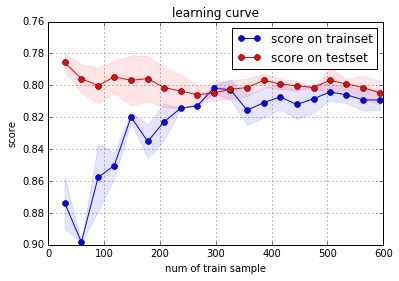

0.80920314253647574

In [25]:
from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator,title,x,y,ylim=None,cv=None,n_jobs=1,
                        train_size=np.linspace(0.05,1.,20),verbose=0,plot=True):
    train_size,train_score,test_score=learning_curve(
                        estimator,x,y,cv=cv,n_jobs=n_jobs,train_sizes=train_size,verbose=verbose)
    train_score_mean=np.mean(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    train_score_std=np.std(train_score,axis=1)
    test_score_std=np.std(test_score,axis=1)
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('num of train sample')
    plt.ylabel('score')
    plt.grid()
    
    plt.fill_between(train_size,train_score_mean-train_score_std,train_score_mean+
                    train_score_std,alpha=0.1,color='b')
    plt.fill_between(train_size,test_score_mean-test_score_std,test_score_mean+
                    test_score_std,alpha=0.1,color='r')
    plt.plot(train_size,train_score_mean,'o-',color='b',label='score on trainset')
    plt.plot(train_size,test_score_mean,'o-',color='r',label='score on testset')
    plt.legend(loc='best')
    plt.draw()
    plt.gca().invert_yaxis()
    plt.show()
    
    return train_score_mean[-1]
plot_learning_curve(clf,'learning curve',x,y)